# Zestaw 3

## Zadanie 1

In [2]:
import numpy as np
from numpy.random import exponential
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
t_start, t_end = 0, 90

lambda_ = 1

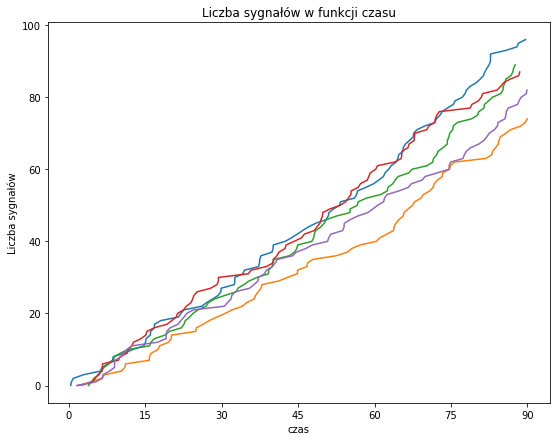

In [4]:
plt.figure(figsize=(9,7))    
samples = 5

for sample in range(samples):
    cumulative_sum = 0
    signals = []
    while cumulative_sum < t_end:
        next_signal = exponential(lambda_)
        signals.append(next_signal)
        cumulative_sum += next_signal
        
    t = np.arange(0, len(signals)-1)
    plt.plot(np.cumsum(signals[:-1]), t)
    
plt.xlabel("czas")
plt.ylabel("Liczba sygnałów")
plt.title("Liczba sygnałów w funkcji czasu")
plt.xticks(np.arange(0, 91, step=15))
plt.savefig("zadanie1.png", facecolor='white')
plt.show()

## Zadanie 2

In [5]:
from math import factorial
import math

def poisson(k, t, lam=1):
    return ((lam * t)**k / factorial(k)) * np.exp((-lam)*t)

In [6]:
samples = 10**4

t1 = []
t20 = []
t90 = []

for sample in range(samples):
    cumulative_sum = 0
    signals = 0
    t1_sample, t20_sample, t90_sample = 0, 0, 0
    while cumulative_sum < t_end:
        next_signal = exponential(lambda_)
        cumulative_sum += next_signal
        signals += 1
        if cumulative_sum <= 1:
            t1_sample = signals
        if cumulative_sum <= 20:
            t20_sample = signals
        if cumulative_sum <= 90:
            t90_sample = signals
    t1.append(t1_sample)
    t20.append(t20_sample)
    t90.append(t90_sample)


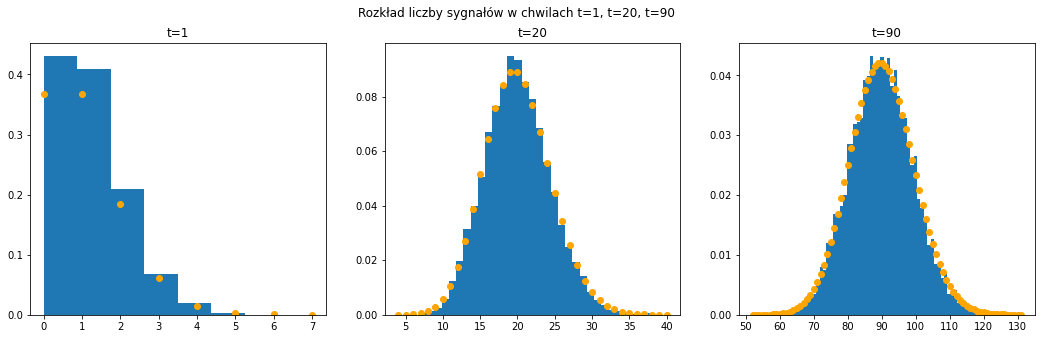

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

X = range(min(t1), max(t1)+1)
Y = [poisson(k=x, t=1) for x in X]
axes[0].scatter(X, Y, color='orange', zorder=2)
axes[0].hist(t1, density=True, bins=len(X))
axes[0].set_title("t=1")

X = range(min(t20), max(t20)+1)
Y = [poisson(k=x, t=20) for x in X]
axes[1].scatter(X, Y, color='orange', zorder=2)
axes[1].hist(t20, density=True, bins=len(X))
axes[1].set_title("t=20")

X = range(min(t90), max(t90)+1)
Y = [poisson(k=x, t=90) for x in X]
axes[2].scatter(X, Y, color='orange', zorder=2)
axes[2].hist(t90, density=True, bins=len(X))
axes[2].set_title("t=90")

fig.suptitle("Rozkład liczby sygnałów w chwilach t=1, t=20, t=90")
plt.savefig("zadanie2.png", facecolor='white')
plt.show()

## Zadanie 3

In [8]:
ks = [2, 5, 10, 50]
czasy_oczekiwania = dict.fromkeys(ks)
samples = 10**4

for k in ks:
    czasy_oczekiwania[k] = []
    for sample in range(samples):
        czasy_oczekiwania[k].append(np.sum([exponential() for _ in range(k)]))

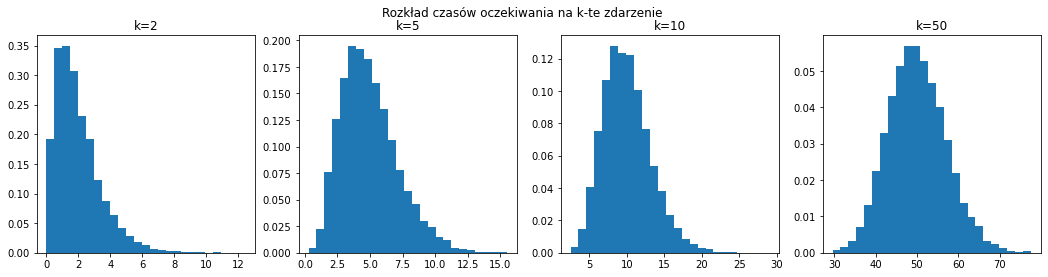

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
fig.suptitle("Rozkład czasów oczekiwania na k-te zdarzenie")

for ax, k in zip(axes, ks):
    ax.set_title(f"k={k}")
    ax.hist(czasy_oczekiwania[k], density=True, bins=25)
    
plt.savefig("zadanie3.png", facecolor='white')
plt.show()

### Wartość oczekiwana

In [12]:
print("λ=1")
for k in ks:
    print(f"k={k} \t E(k)={np.average(czasy_oczekiwania[k]):0.3f} \t E(Γ(k, λ))={k/lambda_}")

λ=1
k=2 	 E(k)=1.994 	 E(Γ(k, λ))=2.0
k=5 	 E(k)=4.976 	 E(Γ(k, λ))=5.0
k=10 	 E(k)=10.009 	 E(Γ(k, λ))=10.0
k=50 	 E(k)=50.041 	 E(Γ(k, λ))=50.0


### Odchylenie standardowe

In [13]:
print("λ=1")
for k in ks:
    print(f"k={k} \t std={np.std(czasy_oczekiwania[k]):0.5f} \t σ(Γ(k, λ))={np.sqrt(k)/lambda_:0.5f}")

λ=1
k=2 	 std=1.41547 	 σ(Γ(k, λ))=1.41421
k=5 	 std=2.17810 	 σ(Γ(k, λ))=2.23607
k=10 	 std=3.15824 	 σ(Γ(k, λ))=3.16228
k=50 	 std=6.97623 	 σ(Γ(k, λ))=7.07107
